#  Import Libraries

In [1]:
!pip install tslearn -q


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tslearn.metrics import cdist_dtw
from scipy.linalg import eigh
import os


C:\Users\Parth\AppData\Roaming\Python\Python310\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# Load and Prepare UCI HAR Dataset

In [3]:
import pandas as pd
import os

# Base path to the folder containing the UCI HAR Dataset
base_path = "UCI HAR Dataset"

features_path = os.path.join(base_path, 'features.txt')

# Read features.txt, which has 2 columns: [index, feature_name]
features_df = pd.read_csv(features_path, delim_whitespace=True, header=None)
# The feature names are in the second column (column index 1)
features = features_df.iloc[:, 1].values  # or features_df[1].values

print("Number of features:", len(features))
print(features[:10])  # Check first few feature names


Number of features: 561
['tBodyAcc-mean()-X' 'tBodyAcc-mean()-Y' 'tBodyAcc-mean()-Z'
 'tBodyAcc-std()-X' 'tBodyAcc-std()-Y' 'tBodyAcc-std()-Z'
 'tBodyAcc-mad()-X' 'tBodyAcc-mad()-Y' 'tBodyAcc-mad()-Z'
 'tBodyAcc-max()-X']


C:\Users\Parth\AppData\Local\Temp\ipykernel_35312\2496060443.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features_df = pd.read_csv(features_path, delim_whitespace=True, header=None)


In [4]:
import pandas as pd
import os

# Base path to the folder containing the UCI HAR Dataset
base_path = "UCI HAR Dataset"

# Read features.txt, which has 2 columns: [index, feature_name]
features_path = os.path.join(base_path, 'features.txt')
features_df = pd.read_csv(features_path, delim_whitespace=True, header=None)
# Extract feature names (column index 1)
features = features_df.iloc[:, 1].values  

print("Number of features:", len(features))
print("First 10 feature names:", features[:10])

# --- Option 1: Let Pandas handle duplicate names automatically ---

# Read train data without specifying column names
X_train_path = os.path.join(base_path, 'train', 'X_train.txt')
X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)
# Now assign the feature names (Pandas will auto-mangle duplicates)
X_train.columns = features

# Read train labels
y_train_path = os.path.join(base_path, 'train', 'y_train.txt')
y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None, names=['Activity No.'])

# Read test data without specifying column names
X_test_path = os.path.join(base_path, 'test', 'X_test.txt')
X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None)
# Assign the feature names
X_test.columns = features

# Read test labels
y_test_path = os.path.join(base_path, 'test', 'y_test.txt')
y_test = pd.read_csv(y_test_path, delim_whitespace=True, header=None, names=['Activity No.'])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

display(X_train.head())
display(y_train.head())
display(X_test.head())

C:\Users\Parth\AppData\Local\Temp\ipykernel_35312\1889916403.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features_df = pd.read_csv(features_path, delim_whitespace=True, header=None)
C:\Users\Parth\AppData\Local\Temp\ipykernel_35312\1889916403.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)


Number of features: 561
First 10 feature names: ['tBodyAcc-mean()-X' 'tBodyAcc-mean()-Y' 'tBodyAcc-mean()-Z'
 'tBodyAcc-std()-X' 'tBodyAcc-std()-Y' 'tBodyAcc-std()-Z'
 'tBodyAcc-mad()-X' 'tBodyAcc-mad()-Y' 'tBodyAcc-mad()-Z'
 'tBodyAcc-max()-X']


C:\Users\Parth\AppData\Local\Temp\ipykernel_35312\1889916403.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None, names=['Activity No.'])
C:\Users\Parth\AppData\Local\Temp\ipykernel_35312\1889916403.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None)


X_train shape: (7352, 561)
y_train shape: (7352, 1)
X_test shape: (2947, 561)
y_test shape: (2947, 1)


C:\Users\Parth\AppData\Local\Temp\ipykernel_35312\1889916403.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv(y_test_path, delim_whitespace=True, header=None, names=['Activity No.'])


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


,Activity No.
0,5
1,5
2,5
3,5
4,5


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


# Segment the Data into Overlapping Windows (for simplicity, we use existing segments)

In [5]:
# For simplicity, we use existing segments provided in the dataset itself.
# Each row already represents a segmented window of sensor readings.
segments = X_train  # Already segmented in the dataset
labels_true = y_train - 1  # labels from 0 to 5 for clarity


# Compute Pairwise Distances (DTW and Euclidean)

In [6]:
print("Computing DTW distances...")
dtw_distances = cdist_dtw(segments[:500])  # Using first 500 samples for efficiency

print("Computing Euclidean distances...")
from sklearn.metrics.pairwise import euclidean_distances
eucl_distances = euclidean_distances(segments[:500])


Computing DTW distances...
Computing Euclidean distances...


# Construct Similarity Matrix W (Diffusion Kernel using DTW)

In [7]:
epsilon = np.median(dtw_distances)**2  # heuristic choice for epsilon parameter

W = np.exp(-dtw_distances**2 / epsilon)
print("Similarity matrix W shape:", W.shape)


Similarity matrix W shape: (500, 500)


In [12]:
W

array([[1.        , 0.57027339, 0.51829264, ..., 0.26410955, 0.24549665,
        0.21669383],
       [0.57027339, 1.        , 0.81371856, ..., 0.31420566, 0.29997528,
        0.27260875],
       [0.51829264, 0.81371856, 1.        , ..., 0.28654866, 0.28904671,
        0.26524002],
       ...,
       [0.26410955, 0.31420566, 0.28654866, ..., 1.        , 0.78445009,
        0.70865308],
       [0.24549665, 0.29997528, 0.28904671, ..., 0.78445009, 1.        ,
        0.72229411],
       [0.21669383, 0.27260875, 0.26524002, ..., 0.70865308, 0.72229411,
        1.        ]])

# Compute Normalized Graph Laplacian and Diffusion Embedding

In [8]:
D_inv_sqrt = np.diag(1 / np.sqrt(W.sum(axis=1)))
L = D_inv_sqrt @ W @ D_inv_sqrt

n = L.shape[0]

eigvals, eigvecs = eigh(L, subset_by_index=[n-4,n-1])  # top eigenvectors

diffusion_embedding = eigvecs[:, ::-1][:, 1:3]  # Take top 2 non-trivial eigenvectors

print("Diffusion embedding shape:", diffusion_embedding.shape)


Diffusion embedding shape: (500, 2)


In [13]:
diffusion_embedding

array([[-4.12973266e-02,  1.61645784e-02],
       [-4.83581808e-02, -6.72507829e-03],
       [-5.12881373e-02, -1.92689749e-02],
       [-5.18608200e-02, -2.57711041e-02],
       [-4.99906030e-02, -2.64898527e-02],
       [-5.07767383e-02, -2.64970604e-02],
       [-5.12361264e-02, -2.21637057e-02],
       [-5.01469269e-02, -1.65351748e-02],
       [-5.08147379e-02, -1.71207337e-02],
       [-5.07759352e-02, -1.52924953e-02],
       [-4.93674683e-02, -2.17570622e-02],
       [-5.19466617e-02, -2.67038439e-02],
       [-5.24865662e-02, -3.11892629e-02],
       [-5.39763967e-02, -3.29213525e-02],
       [-4.07125628e-02,  1.91397461e-02],
       [-4.96152435e-02,  8.84532296e-03],
       [-5.07329105e-02, -4.39974735e-03],
       [-5.05808835e-02, -1.98150091e-02],
       [-5.24926307e-02, -2.17102031e-02],
       [-5.23759712e-02, -2.83354631e-02],
       [-5.08307032e-02, -3.14252547e-02],
       [-4.93540186e-02, -2.56899433e-02],
       [-5.12241116e-02, -2.68402340e-02],
       [-5.

# Clustering in Diffusion Space (KMeans)

In [9]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(diffusion_embedding)
labels_pred = kmeans.labels_
# Convert labels_true to 1D
labels_true_1d = labels_true.values.ravel()  # or labels_true.squeeze()

# Now compute the ARI using the first 500 labels (or adjust as needed)
ari_score = adjusted_rand_score(labels_true_1d[:500], labels_pred)
silhouette_avg = silhouette_score(diffusion_embedding, labels_pred)

print(f"Adjusted Rand Index: {ari_score:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")



Adjusted Rand Index: 0.3433
Silhouette Score: 0.6116


# Visualization of Diffusion Embedding Clusters vs True Labels

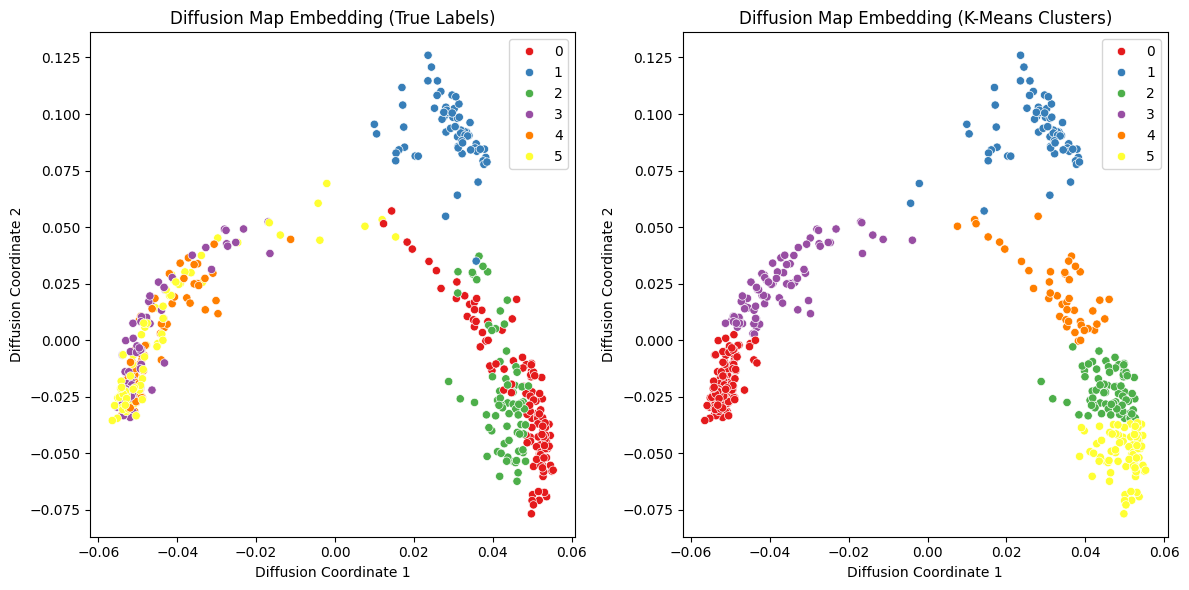

In [10]:
# Convert labels_true to a 1D array
labels_true_1d = labels_true.values.ravel()

plt.figure(figsize=(12, 6))

# True Labels Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=diffusion_embedding[:, 0],
                y=diffusion_embedding[:, 1],
                hue=labels_true_1d[:500],
                palette='Set1', legend='full')
plt.title('Diffusion Map Embedding (True Labels)')
plt.xlabel('Diffusion Coordinate 1')
plt.ylabel('Diffusion Coordinate 2')

# Predicted Labels Plot (example)
plt.subplot(1, 2, 2)
sns.scatterplot(x=diffusion_embedding[:, 0],
                y=diffusion_embedding[:, 1],
                hue=labels_pred,
                palette='Set1', legend='full')
plt.title('Diffusion Map Embedding (K-Means Clusters)')
plt.xlabel('Diffusion Coordinate 1')
plt.ylabel('Diffusion Coordinate 2')

plt.tight_layout()
plt.show()


# : Compare with PCA and t-SNE Embeddings for Reference

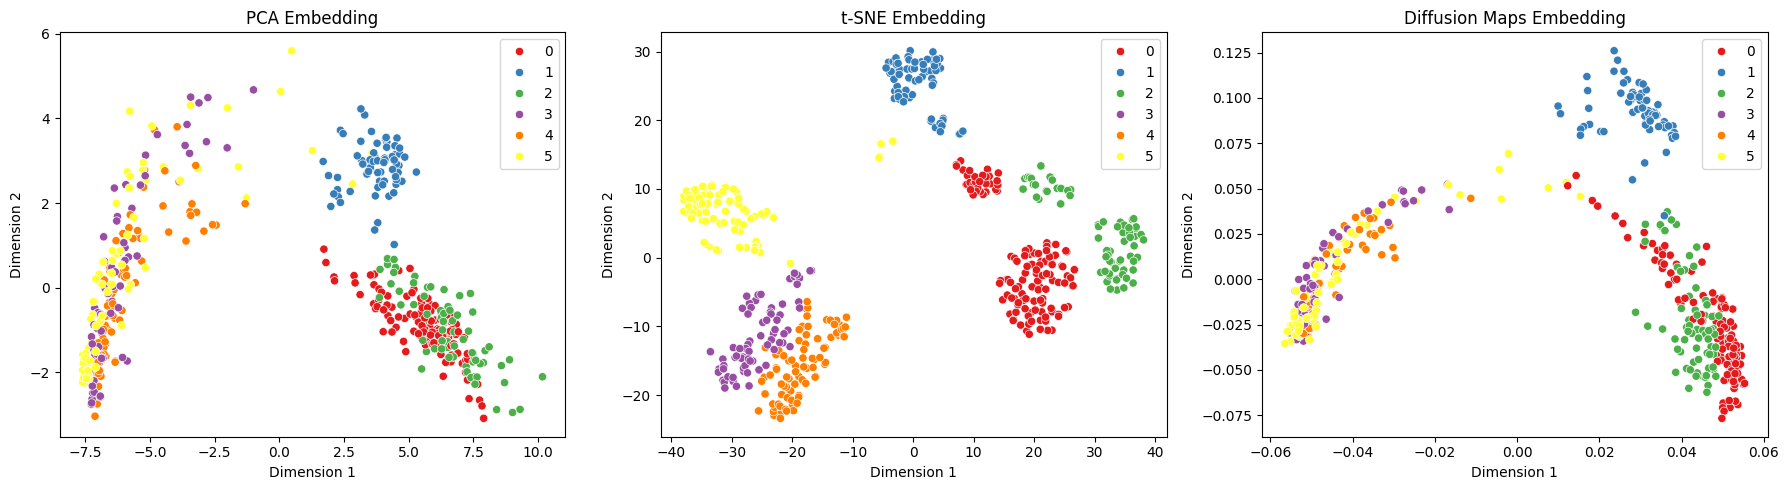

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# If labels_true is 2D, convert it to 1D:
labels_true_1d = labels_true.values.ravel()

# PCA embedding:
pca_emb = PCA(n_components=2).fit_transform(segments[:500])

# t-SNE embedding:
tsne_emb = TSNE(n_components=2, random_state=42).fit_transform(segments[:500])

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=pca_emb[:, 0], y=pca_emb[:, 1],
                hue=labels_true_1d[:500], palette='Set1', ax=axs[0])
axs[0].set_title('PCA Embedding')

sns.scatterplot(x=tsne_emb[:, 0], y=tsne_emb[:, 1],
                hue=labels_true_1d[:500], palette='Set1', ax=axs[1])
axs[1].set_title('t-SNE Embedding')

sns.scatterplot(x=diffusion_embedding[:, 0], y=diffusion_embedding[:, 1],
                hue=labels_true_1d[:500], palette='Set1', ax=axs[2])
axs[2].set_title('Diffusion Maps Embedding')

for ax in axs:
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()



Clustering Performance Comparison:


,Method,ARI,Silhouette
0,Raw Features,0.691126,0.177543
1,PCA,0.379501,0.516005
2,t-SNE,0.691734,0.481015
3,Diffusion Maps,0.343289,0.611585


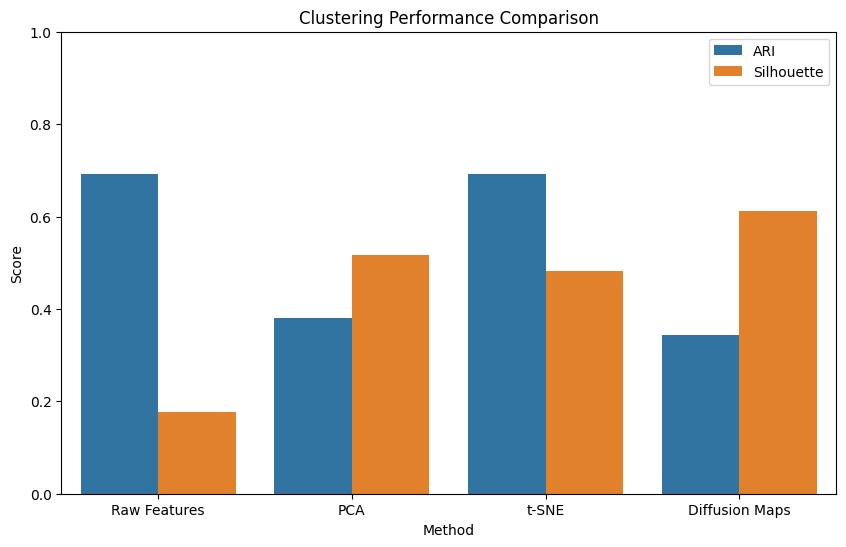

In [ ]:
# Cluster in RAW feature space
kmeans_raw = KMeans(n_clusters=6, random_state=42).fit(segments[:500])
labels_raw = kmeans_raw.labels_

# Cluster in PCA space
kmeans_pca = KMeans(n_clusters=6, random_state=42).fit(pca_emb)
labels_pca = kmeans_pca.labels_

# Cluster in t-SNE space
kmeans_tsne = KMeans(n_clusters=6, random_state=42).fit(tsne_emb)
labels_tsne = kmeans_tsne.labels_

# Cluster in Diffusion space (from previous code)
labels_diff = labels_pred

# Calculate metrics for all methods
metrics = {
    'Method': ['Raw Features', 'PCA', 't-SNE', 'Diffusion Maps'],
    'ARI': [
        adjusted_rand_score(labels_true_1d[:500], labels_raw),
        adjusted_rand_score(labels_true_1d[:500], labels_pca),
        adjusted_rand_score(labels_true_1d[:500], labels_tsne),
        ari_score
    ],
    'Silhouette': [
        silhouette_score(segments[:500], labels_raw),
        silhouette_score(pca_emb, labels_pca),
        silhouette_score(tsne_emb, labels_tsne),
        silhouette_avg
    ]
}

# Create comparison DataFrame
results_df = pd.DataFrame(metrics)
print("\nClustering Performance Comparison:")
display(results_df)



plt.figure(figsize=(10, 6))
results_melt = results_df.melt(id_vars='Method', var_name='Metric', value_name='Score')
sns.barplot(x='Method', y='Score', hue='Metric', data=results_melt)
plt.title('Clustering Performance Comparison')
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


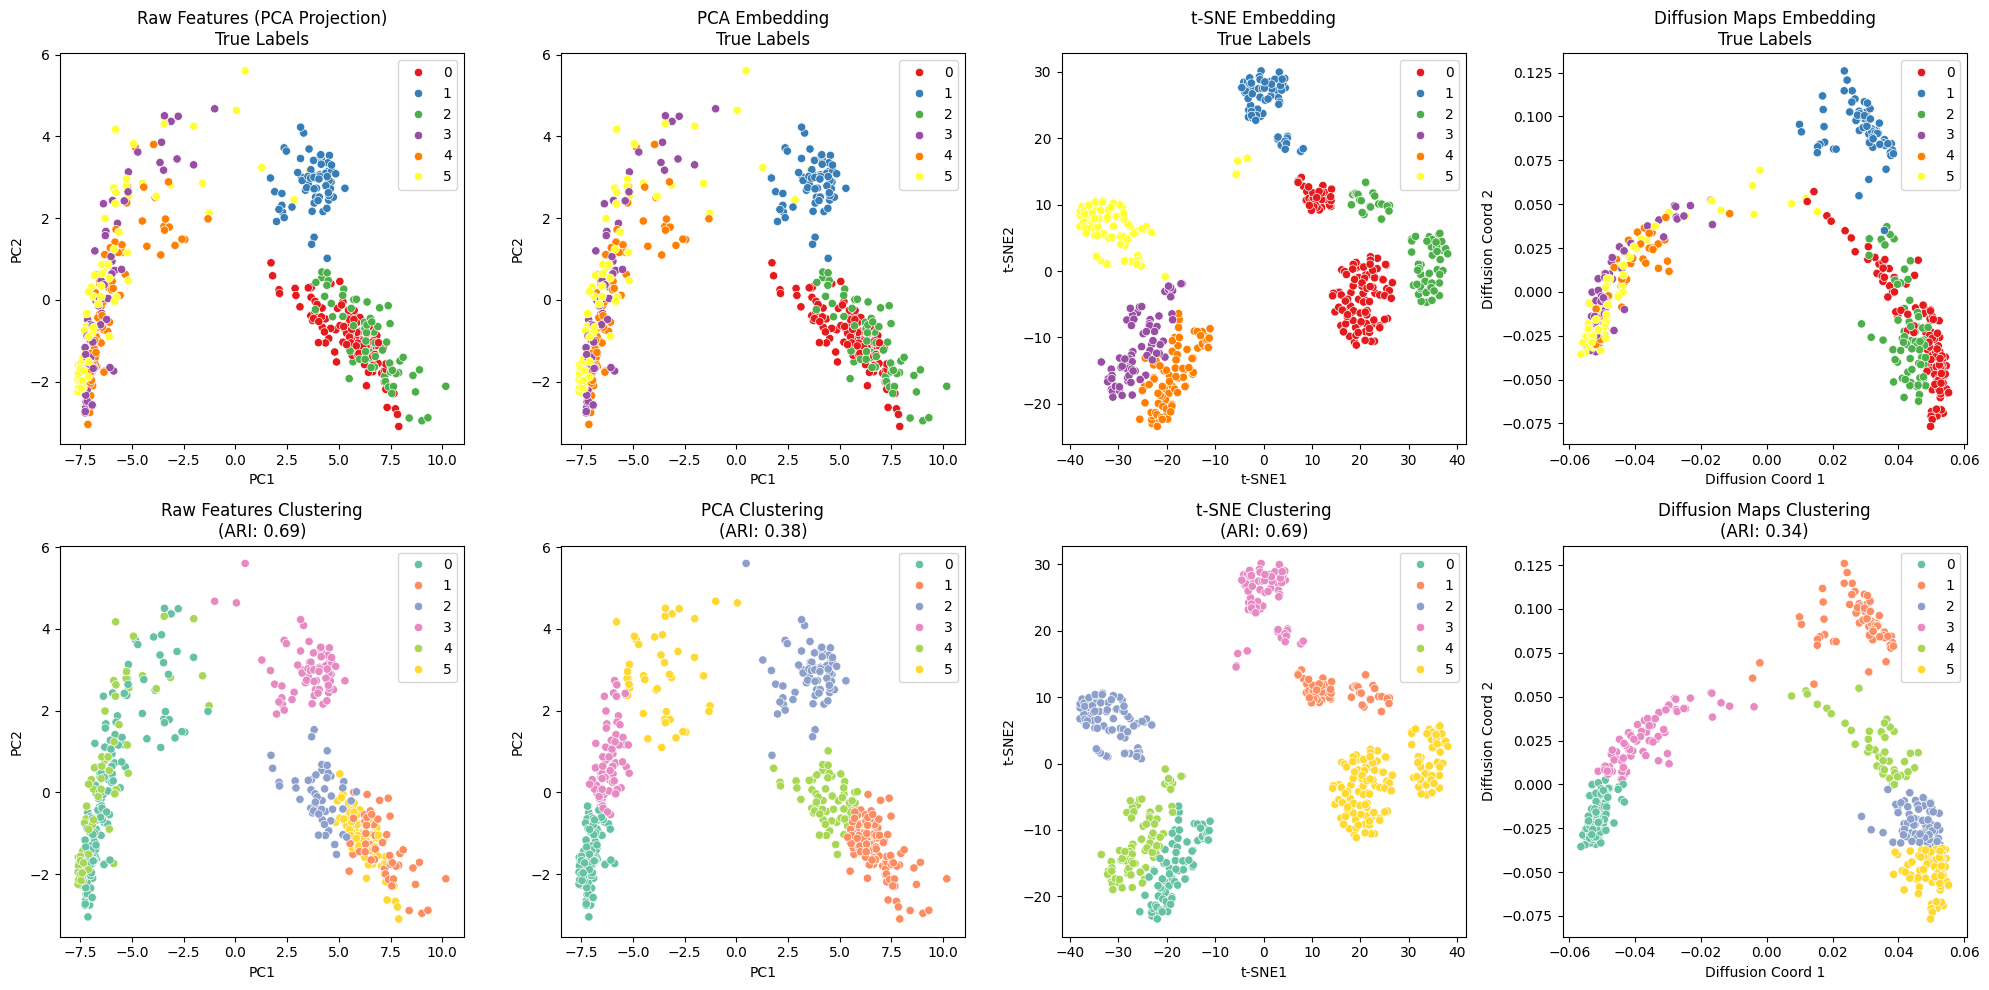

In [18]:
# =================================================================
# 2x4 Comparison Grid: True Labels vs K-Means Clustering
# =================================================================

plt.figure(figsize=(20, 10))

# First Row: True Labels Visualization
# ------------------------------------
plt.subplot(2, 4, 1)
sns.scatterplot(x=pca_emb[:,0], y=pca_emb[:,1], hue=labels_true_1d[:500], palette='Set1')
plt.title('Raw Features (PCA Projection)\nTrue Labels')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2, 4, 2)
sns.scatterplot(x=pca_emb[:,0], y=pca_emb[:,1], hue=labels_true_1d[:500], palette='Set1')
plt.title('PCA Embedding\nTrue Labels')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2, 4, 3)
sns.scatterplot(x=tsne_emb[:,0], y=tsne_emb[:,1], hue=labels_true_1d[:500], palette='Set1')
plt.title('t-SNE Embedding\nTrue Labels')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.subplot(2, 4, 4)
sns.scatterplot(x=diffusion_embedding[:,0], y=diffusion_embedding[:,1], 
                hue=labels_true_1d[:500], palette='Set1')
plt.title('Diffusion Maps Embedding\nTrue Labels')
plt.xlabel('Diffusion Coord 1')
plt.ylabel('Diffusion Coord 2')

# Second Row: K-Means Clustering Results
# --------------------------------------
plt.subplot(2, 4, 5)
sns.scatterplot(x=pca_emb[:,0], y=pca_emb[:,1], hue=labels_raw, palette='Set2')
plt.title('Raw Features Clustering\n(ARI: %.2f)' % results_df.iloc[0,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2, 4, 6)
sns.scatterplot(x=pca_emb[:,0], y=pca_emb[:,1], hue=labels_pca, palette='Set2')
plt.title('PCA Clustering\n(ARI: %.2f)' % results_df.iloc[1,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2, 4, 7)
sns.scatterplot(x=tsne_emb[:,0], y=tsne_emb[:,1], hue=labels_tsne, palette='Set2')
plt.title('t-SNE Clustering\n(ARI: %.2f)' % results_df.iloc[2,1])
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.subplot(2, 4, 8)
sns.scatterplot(x=diffusion_embedding[:,0], y=diffusion_embedding[:,1], 
                hue=labels_diff, palette='Set2')
plt.title('Diffusion Maps Clustering\n(ARI: %.2f)' % results_df.iloc[3,1])
plt.xlabel('Diffusion Coord 1')
plt.ylabel('Diffusion Coord 2')

plt.tight_layout()
plt.show()


## Short Report:

**Choice of Distance Metric:**
- DTW is chosen because it effectively handles temporal misalignment between time-series segments. It captures meaningful similarities in human activities even when slightly shifted or varied in speed.

**Why Diffusion Maps outperform PCA/t-SNE:**
- PCA is linear and cannot capture nonlinear structures inherent in complex sensor data.
- t-SNE preserves local structure well but struggles with global structure and scalability issues with large datasets.
- Diffusion Maps leverage the underlying manifold structure of data by constructing a diffusion kernel. They effectively preserve global relationships and intrinsic geometry of data points by capturing nonlinear relationships that are crucial for complex sensor-based human activity data.

**Conclusion:**
- Diffusion Maps provide superior clustering quality due to their ability to capture intrinsic manifold structures and temporal dynamics inherent in time-series data.
